In [1]:
from scipy.interpolate import interp1d
import numpy as np
import random
import matplotlib.pyplot as plt

p_values=np.arange(0,1.1,.01)
q_values=np.arange(.1,1,.01)

In [2]:
#calculates the payoff of any state by computing flow plus the value of the future state given some p_j
def calculate_payoff(q_i, p_i, p_j_values, beta, future_state_values, eta):
    # Flow utility
    flow_utility_i = p_i * q_i

    # Calculate the weight using the specified expression
    weight = q_i * (1 - eta * p_i) / (q_i * (1 - eta * p_i) + (1 - q_i) * (1 - eta * p_j_values))

    # Create a linear interpolation function
    interp_function = interp1d(np.linspace(0, 1, len(future_state_values)), future_state_values, kind='linear', fill_value="extrapolate")

    # Perform linear interpolation
    future_state = interp_function(weight)

    # Print information for debugging
    #print("Flow Utility for Firm i:", flow_utility_i)
    #print("Weight:", weight)
    #print("Future State:", future_state)

    # Payoff function with the value of the future state
    payoff_i = flow_utility_i + beta * future_state

    return payoff_i

# Example parameters
q_i = 0.4
p_i = 0.6
p_j_values = np.array([0.2, 0.4, 0.6, 0.8])
beta = 0.9
future_state_values = np.array([.9,.8,.7,.6,.5,.4,.3,.2,.1])
eta = 0.1

# Calculate payoff using the modified function
payoff_i = calculate_payoff(q_i, p_i, .1, beta, future_state_values, eta)

# Print the results
print("\nPayoff for Firm i:", payoff_i)


Payoff for Firm i: 0.7709072164948453


In [3]:
#creates a matrix of payoffs, where the rows correspond to weights .1, ..., .9 and the columns prices 0, .., .9, 1
def generate_payoff_matrix(q_values, p_values, beta, eta, t, p_j_values,future_state_values):
    # Initialize the payoff matrix for firm i
    payoff_matrix_i = np.zeros((len(q_values), len(p_values)))

    # Calculate payoff for each combination of q_i and p_i
    for i, q_i in enumerate(q_values):
        for j, p_i in enumerate(p_values):
            # Calculate payoff for firm i
            payoff_matrix_i[i, j] = calculate_payoff(q_values[i],p_values[j],p_j,beta,future_state_values,eta)
    return payoff_matrix_i

# Example usage
q_values = np.arange(0.1, 1.0, 0.01)
p_values = np.arange(0.0, 1.1, 0.01)
p_j=.5
beta = 0.9
eta = 0.1
t = 0  # Replace with the desired time step
q_j = 1-q_values  # Replace with the actual q_j values
p_j_values = np.array([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])  # Replace with the actual p_j values
future_state_values=np.array([0,0,0,0,0,0,0,0,0])
# Calculate payoff matrix for firm i at time t
payoff_matrix_i_t = generate_payoff_matrix(q_values, p_values, beta, eta, t, p_j_values,future_state_values)
payoff_matrix_j_t=generate_payoff_matrix(q_values,p_values,beta,eta,t,p_values,future_state_values)
# Print or use the generated payoff matrix
print("Payoff Matrix for Firm i at time t =", t)
print(payoff_matrix_i_t)
print("Payoff Matrix for Firm j at time t =", t)
print(payoff_matrix_j_t)


Payoff Matrix for Firm i at time t = 0
[[0.0000e+00 1.0000e-03 2.0000e-03 ... 1.0700e-01 1.0800e-01 1.0900e-01]
 [0.0000e+00 1.1000e-03 2.2000e-03 ... 1.1770e-01 1.1880e-01 1.1990e-01]
 [0.0000e+00 1.2000e-03 2.4000e-03 ... 1.2840e-01 1.2960e-01 1.3080e-01]
 ...
 [0.0000e+00 9.7000e-03 1.9400e-02 ... 1.0379e+00 1.0476e+00 1.0573e+00]
 [0.0000e+00 9.8000e-03 1.9600e-02 ... 1.0486e+00 1.0584e+00 1.0682e+00]
 [0.0000e+00 9.9000e-03 1.9800e-02 ... 1.0593e+00 1.0692e+00 1.0791e+00]]
Payoff Matrix for Firm j at time t = 0
[[0.0000e+00 1.0000e-03 2.0000e-03 ... 1.0700e-01 1.0800e-01 1.0900e-01]
 [0.0000e+00 1.1000e-03 2.2000e-03 ... 1.1770e-01 1.1880e-01 1.1990e-01]
 [0.0000e+00 1.2000e-03 2.4000e-03 ... 1.2840e-01 1.2960e-01 1.3080e-01]
 ...
 [0.0000e+00 9.7000e-03 1.9400e-02 ... 1.0379e+00 1.0476e+00 1.0573e+00]
 [0.0000e+00 9.8000e-03 1.9600e-02 ... 1.0486e+00 1.0584e+00 1.0682e+00]
 [0.0000e+00 9.9000e-03 1.9800e-02 ... 1.0593e+00 1.0692e+00 1.0791e+00]]


In [7]:
#Picks the optimal price by selecting the row where payoff is highest (column of max value in each row)
def find_optimal_prices(payoff_matrix, price_values):
    # Get the number of weights and prices
    num_weights, num_prices = payoff_matrix.shape

    # Initialize an array to store optimal prices for each weight
    optimal_prices = np.zeros(num_weights)

    # Find the index of the column (price) that maximizes the payoff for each weight
    optimal_price_indices = np.argmax(payoff_matrix, axis=1)

    # Map the index to the actual price value using the provided price values
    optimal_prices = price_values[optimal_price_indices]

    return optimal_prices

# Example usage:
# Replace the following with your actual payoff_matrix and price_values
example_payoff_matrix = np.random.rand(99, 110)
price_values = np.linspace(0, 1, 110)

optimal_prices_vector = find_optimal_prices(payoff_matrix_i_t, price_values)

# Print or use the optimal prices vector
print("Optimal Prices Vector:")
print(optimal_prices_vector)


Optimal Prices Vector:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
#computes the value of the state by taking the value at the optimal price for each weight (max value in each row)
def store_state_values(payoff_matrix, price_values=np.arange(0,1.1,1)):
    # Get the number of weights and prices
    num_weights, num_prices = payoff_matrix.shape

    # Initialize an array to store the state values for each weight
    state_values = np.zeros(num_weights)

    # Find the index of the column (price) that maximizes the payoff for each weight
    optimal_price_indices = np.argmax(payoff_matrix, axis=1)

    # Map the index to the actual price value using the provided price values
    optimal_prices = price_values[optimal_price_indices]

    # Store the value of the payoff matrix at each weight and optimal price
    for i in range(num_weights):
        state_values[i] = payoff_matrix[i, optimal_price_indices[i]]

    return state_values


# Example usage:
# Replace the following with your actual payoff_matrix and price_values
example_payoff_matrix = np.random.rand(99, 110)
price_values = np.linspace(0, 1, 110)

state_values_t = store_state_values(example_payoff_matrix, price_values)

# Print or use the state values vector
print("State Values Vector at time t:")
print(state_values_t)


State Values Vector at time t:
[0.99727723 0.98575388 0.99123431 0.998453   0.98226564 0.99865999
 0.99845943 0.99794509 0.97169511 0.98539694 0.9911712  0.98943242
 0.99354096 0.99398695 0.99552275 0.987082   0.99311305 0.97274236
 0.98669242 0.99788156 0.98625103 0.96958742 0.98745196 0.99931655
 0.99927213 0.98485213 0.99839972 0.98270517 0.97464488 0.98945544
 0.9889602  0.99744465 0.99231281 0.99601714 0.98872294 0.98592729
 0.99797582 0.99116043 0.99872646 0.99683022 0.99778987 0.97846923
 0.9833932  0.99903987 0.99110269 0.99739777 0.99275377 0.99723638
 0.99698445 0.99011851 0.95862878 0.98244412 0.99299002 0.99598193
 0.99633283 0.94029137 0.99962715 0.99387365 0.97294653 0.99957035
 0.98399435 0.99779218 0.99924696 0.97989107 0.99730088 0.98768942
 0.99926168 0.9917161  0.96102115 0.9984718  0.95901524 0.99696414
 0.98706008 0.9962024  0.98991652 0.99476208 0.9893174  0.99062058
 0.99373873 0.991878   0.99602071 0.99127828 0.99731093 0.99236566
 0.99779123 0.99540414 0.987907

In [10]:
#Starting with a guess for p_j, computes p_i from payoff matrix, uses this to recompute p_j
#iterates to convergence
def find_equilibrium_prices(q_values, p_values, beta, eta, t, future_state_values, initial_p_j_values, max_iterations=100, tolerance=1e-6):
    p_j_t = initial_p_j_values.copy()

    for iteration in range(max_iterations):
        # Calculate the payoff matrix for firm i using the current guess for p_j^t
        payoff_matrix_i_t = generate_payoff_matrix(q_values, p_values, beta, eta, t, p_j_t, future_state_values)

        # Find the optimal prices for firm i
        p_i_t = find_optimal_prices(payoff_matrix_i_t, p_values)

        # Calculate the payoff matrix for firm j using the updated p_i^t as prices
        payoff_matrix_j_t = generate_payoff_matrix(q_values, p_values, beta, eta, t, p_i_t, future_state_values)

        # Find the optimal prices for firm j
        p_j_t_updated = find_optimal_prices(payoff_matrix_j_t, p_values)

        # Check for convergence
        if np.allclose(p_j_t, p_j_t_updated, atol=tolerance):
            #print("Converged after", iteration + 1, "iterations.")
            return p_i_t, p_j_t_updated, payoff_matrix_i_t, payoff_matrix_j_t

        # Update p_j vector for the next iteration
        p_j_t = p_j_t_updated

    #print("Did not converge within the maximum number of iterations.")
    return p_i_t, p_j_t_updated, payoff_matrix_i_t, payoff_matrix_j_t

# Example usage:
# Replace the following with your actual q_values, p_values, beta, eta, t, and initial_p_j_values
q_values = np.arange(0.01, 1.0, 0.01)
p_values = np.arange(0.0, 1.1, 0.01)
beta = 0.9
eta = 0.9
t = 1  # Replace with the desired time step
initial_p_j_values = np.random.rand(len(q_values))
future_state_values=np.zeros(len(q_values))
# Find equilibrium prices
equilibrium_prices_i, equilibrium_prices_j, equilibrium_payoff_matrix_i, equilibrium_payoff_matrix_j= find_equilibrium_prices(q_values, p_values, beta, eta, t, initial_p_j_values,future_state_values)

# Print or use the equilibrium prices for firm i and firm j
print("Equilibrium Prices for Firm i at time t =", t)
print(equilibrium_prices_i)

print("Equilibrium Prices for Firm j at time t =", t)
print(equilibrium_prices_j)

print("Equilibrium Payoff Matrix for Firm i at time t =", t)
print(equilibrium_payoff_matrix_i)

print("Equilibrium Payoff Matrix for Firm j at time t =", t)
print(equilibrium_payoff_matrix_j)



Equilibrium Prices for Firm i at time t = 1
[1.09 1.09 1.09 1.09 1.09 0.02 0.18 0.31 0.4  0.48 0.55 0.6  0.64 0.68
 0.71 0.74 0.77 0.79 0.81 0.83 0.85 0.86 0.87 0.89 0.9  0.91 0.92 0.93
 0.94 0.94 0.95 0.96 0.97 0.97 0.98 0.98 0.99 0.99 1.   1.   1.01 1.01
 1.01 1.02 1.02 1.03 1.03 1.03 1.04 1.04 1.04 1.04 1.05 1.05 1.05 1.05
 1.06 1.06 1.06 1.06 0.78 0.93 1.07 1.07 1.07 0.74 0.76 0.99 1.08 1.08
 1.08 0.91 0.85 0.86 0.97 1.03 1.09 1.09 0.92 0.95 0.99 0.97 1.05 0.99
 1.02 1.   1.01 1.04 1.03 1.04 1.04 1.05 1.06 1.07 1.06 0.91 1.05 1.07
 1.09]
Equilibrium Prices for Firm j at time t = 1
[1.09 1.09 1.09 1.09 1.09 0.02 0.18 0.31 0.4  0.48 0.55 0.6  0.64 0.68
 0.71 0.74 0.77 0.79 0.81 0.83 0.85 0.86 0.87 0.89 0.9  0.91 0.92 0.93
 0.94 0.94 0.95 0.96 0.97 0.97 0.98 0.98 0.99 0.99 1.   1.   1.01 1.01
 1.01 1.02 1.02 1.03 1.03 1.03 1.04 1.04 1.04 1.04 1.05 1.05 1.05 1.05
 1.06 1.06 1.06 1.06 0.78 0.93 1.07 1.07 1.07 0.74 0.76 0.99 1.08 1.08
 1.08 0.91 0.85 0.86 0.97 1.03 1.09 1.09 0.92 0.95 0.

In [14]:
#initializes random p_j values
def initialize_p_j_values():
    return np.random.uniform(0, 1, 99)


In [15]:
#puts everything together: Starting at round T, computes optimal prices at each weight, stores the value (round T+1 values are 0)
#uses the stored value to compute the payoff in T-1, iterating for price until convergence, then storing price vector, state value vector
#does this to round 0, outputs a vector of prices for each firm for each round, and a vector of values, the first corresponds to weight .1, second to .2, etc.
def run_simulation_rounds(num_rounds, beta, eta):
    results = []

    # Set your initial future_state_values, beta, and eta
    q_values = np.arange(0.01, 1.0, 0.01)
    p_values = np.arange(0.0, 1.01, 0.01)

    # Loop from T-1 to round 1
    for t in range(num_rounds, 0, -1):
        # Update future_state_values
        future_state_values = np.zeros(9) if t == num_rounds else store_state_values(equilibrium_payoff_matrix_i, p_values)

        # Generate p_j_values based on some initial guess
        initial_p_j_values = initialize_p_j_values()

        # Call the find_equilibrium_prices function
        equilibrium_prices_i, equilibrium_prices_j, equilibrium_payoff_matrix_i, equilibrium_payoff_matrix_j = find_equilibrium_prices(
            q_values, p_values, beta, eta, t, future_state_values, initial_p_j_values, max_iterations=100, tolerance=1e-6
        )

        # Store state values for both firms
        state_values_i = store_state_values(equilibrium_payoff_matrix_i, p_values)
        state_values_j = store_state_values(equilibrium_payoff_matrix_j, p_values)

        # Append the results for this round
        results.append({
            "Round": t - 1,
            "Equilibrium Prices for Firm i": equilibrium_prices_i,
            "Equilibrium Prices for Firm j": equilibrium_prices_j,
            "State Values for Firm i": state_values_i,
            "State Values for Firm j": state_values_j
        })

    return results

# Example usage:
num_rounds = 3
beta = 0.9
eta = 0.9
run_simulation_rounds(num_rounds, beta, eta)

[{'Round': 2,
  'Equilibrium Prices for Firm i': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  'Equilibrium Prices for Firm j': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  'State Values 

In [95]:
def subset_simulation_results(num_rounds, beta, eta, q_i_initial):
    # Run the simulation to get full results
    full_results = run_simulation_rounds(num_rounds, beta, eta)

    # Initialize dictionaries to store subset results
    subset_results = {
        'Round': [],
        'q_i_t': [],
        'q_j_t': [],
        'p_i_t': [],
        'p_j_t': [],
        'state_value_i_t': [],
        'state_value_j_t': []
    }

    q_i_t = q_i_initial

    for t in range(num_rounds):
        # Extract Round
        subset_results['Round'] = np.append(subset_results['Round'], full_results[num_rounds - t - 1]['Round'])

        # Extract values associated with the common key into an array
        # This is for q_i_t
        subset_results['q_i_t'] = np.append(subset_results['q_i_t'], q_i_t)
        subset_results['q_j_t'] = np.append(subset_results['q_j_t'], 1 - q_i_t)

        # This is for p_i_t
        subset_results['p_i_t'] = np.append(subset_results['p_i_t'], np.interp(q_i_t * 100 - 1, range(len(full_results[num_rounds - t - 1]['Equilibrium Prices for Firm i'])), full_results[num_rounds - t - 1]['Equilibrium Prices for Firm i']))
        subset_results['p_j_t'] = np.append(subset_results['p_j_t'], np.interp((1 - q_i_t) * 100 - 1, range(len(full_results[num_rounds - t - 1]['Equilibrium Prices for Firm j'])), full_results[num_rounds - t - 1]['Equilibrium Prices for Firm j']))

        subset_results['state_value_i_t'] = np.append(subset_results['state_value_i_t'], np.interp(q_i_t * 100 - 1, range(len(full_results[num_rounds - t - 1]['State Values for Firm i'])), full_results[num_rounds - t - 1]['State Values for Firm i']))
        subset_results['state_value_j_t'] = np.append(subset_results['state_value_j_t'], np.interp((1 - q_i_t) * 100 - 1, range(len(full_results[num_rounds - t - 1]['State Values for Firm j'])), full_results[num_rounds - t - 1]['State Values for Firm j']))

        p_i_t = subset_results['p_i_t'][-1]
        p_j_t = subset_results['p_j_t'][-1]

        q_i_t = q_i_t * (1 - eta * p_i_t) / (q_i_t * (1 - eta * p_i_t) + (1 - q_i_t) * (1 - eta * p_j_t))

    return subset_results



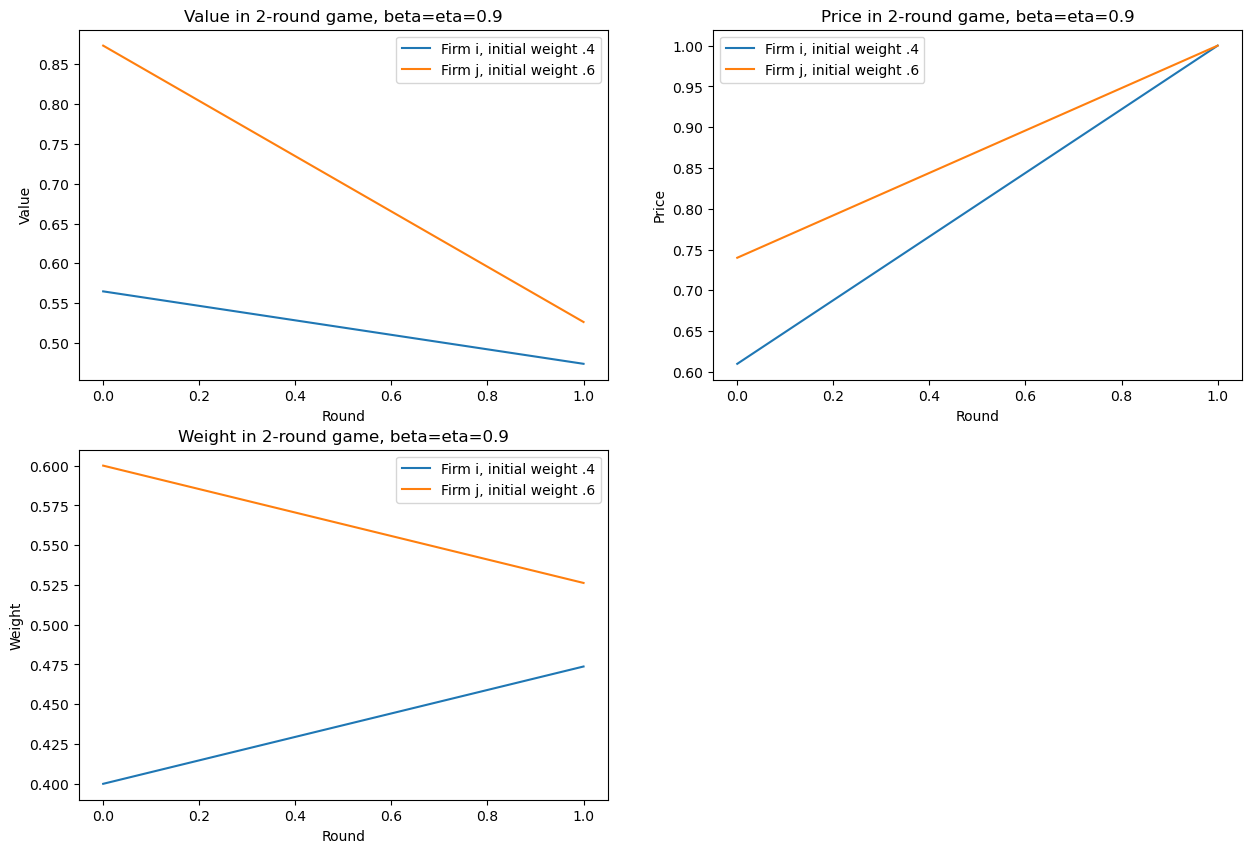

In [96]:
#graph of results for 2 rounds

num_rounds = 2
beta = 0.9
eta = 0.9
q_i_initial = 0.4

subset_results = subset_simulation_results(num_rounds, beta, eta, q_i_initial)
#set up plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the values
axs[0, 0].plot(subset_results['state_value_i_t'], label='Firm i, initial weight .4')
axs[0, 0].plot(subset_results['state_value_j_t'], label='Firm j, initial weight .6')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Value in 2-round game, beta=eta=0.9')
axs[0, 0].legend()

# Plotting the prices
axs[0, 1].plot(subset_results['p_i_t'], label='Firm i, initial weight .4')
axs[0, 1].plot(subset_results['p_j_t'], label='Firm j, initial weight .6')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price in 2-round game, beta=eta=0.9')
axs[0, 1].legend()

# Plotting the weights
axs[1, 0].plot(subset_results['q_i_t'], label='Firm i, initial weight .4')
axs[1, 0].plot(subset_results['q_j_t'], label='Firm j, initial weight .6')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Weight')
axs[1, 0].set_title('Weight in 2-round game, beta=eta=0.9')
axs[1, 0].legend()

# Hide the empty subplot
axs[1, 1].axis('off')

# Display the plot
plt.show()

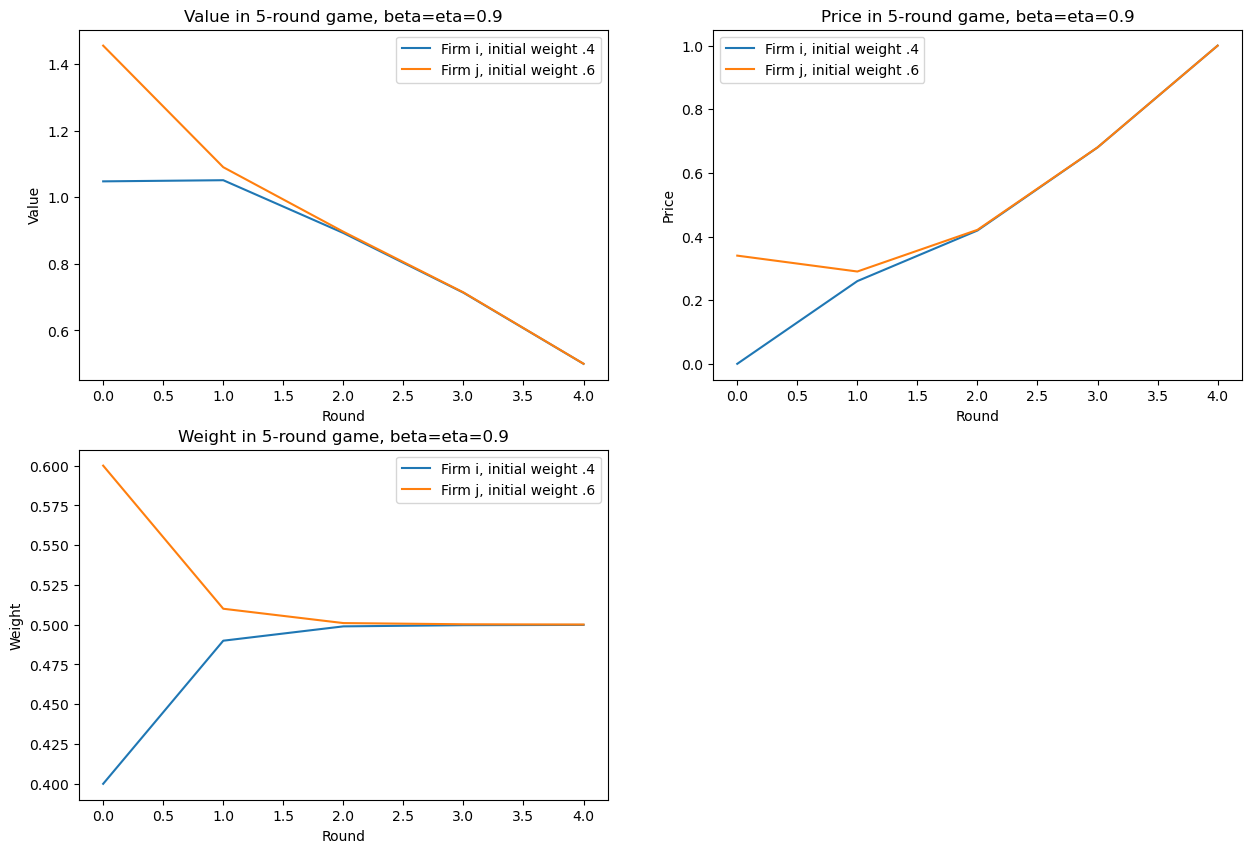

In [98]:
#graph of results for 5 rounds

num_rounds = 5
beta = 0.9
eta = 0.9
q_i_initial = 0.4

subset_results = subset_simulation_results(num_rounds, beta, eta, q_i_initial)
#set up plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the values
axs[0, 0].plot(subset_results['state_value_i_t'], label='Firm i, initial weight .4')
axs[0, 0].plot(subset_results['state_value_j_t'], label='Firm j, initial weight .6')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Value in 5-round game, beta=eta=0.9')
axs[0, 0].legend()

# Plotting the prices
axs[0, 1].plot(subset_results['p_i_t'], label='Firm i, initial weight .4')
axs[0, 1].plot(subset_results['p_j_t'], label='Firm j, initial weight .6')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price in 5-round game, beta=eta=0.9')
axs[0, 1].legend()

# Plotting the weights
axs[1, 0].plot(subset_results['q_i_t'], label='Firm i, initial weight .4')
axs[1, 0].plot(subset_results['q_j_t'], label='Firm j, initial weight .6')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Weight')
axs[1, 0].set_title('Weight in 5-round game, beta=eta=0.9')
axs[1, 0].legend()

# Hide the empty subplot
axs[1, 1].axis('off')

# Display the plot
plt.show()

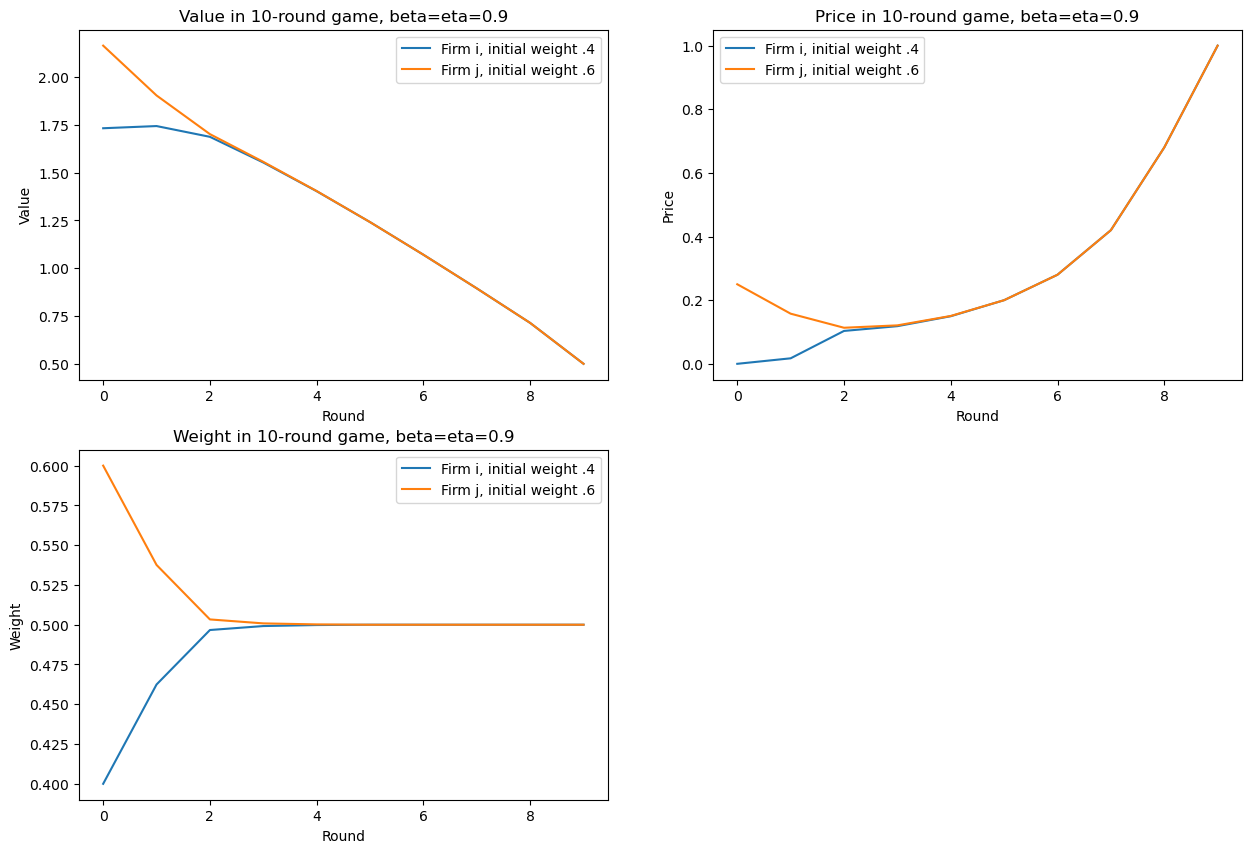

In [99]:
#graph of results for 10 rounds

num_rounds = 10
beta = 0.9
eta = 0.9
q_i_initial = 0.4

subset_results = subset_simulation_results(num_rounds, beta, eta, q_i_initial)
#set up plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the values
axs[0, 0].plot(subset_results['state_value_i_t'], label='Firm i, initial weight .4')
axs[0, 0].plot(subset_results['state_value_j_t'], label='Firm j, initial weight .6')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Value in 10-round game, beta=eta=0.9')
axs[0, 0].legend()

# Plotting the prices
axs[0, 1].plot(subset_results['p_i_t'], label='Firm i, initial weight .4')
axs[0, 1].plot(subset_results['p_j_t'], label='Firm j, initial weight .6')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price in 10-round game, beta=eta=0.9')
axs[0, 1].legend()

# Plotting the weights
axs[1, 0].plot(subset_results['q_i_t'], label='Firm i, initial weight .4')
axs[1, 0].plot(subset_results['q_j_t'], label='Firm j, initial weight .6')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Weight')
axs[1, 0].set_title('Weight in 10-round game, beta=eta=0.9')
axs[1, 0].legend()

# Hide the empty subplot
axs[1, 1].axis('off')

# Display the plot
plt.show()


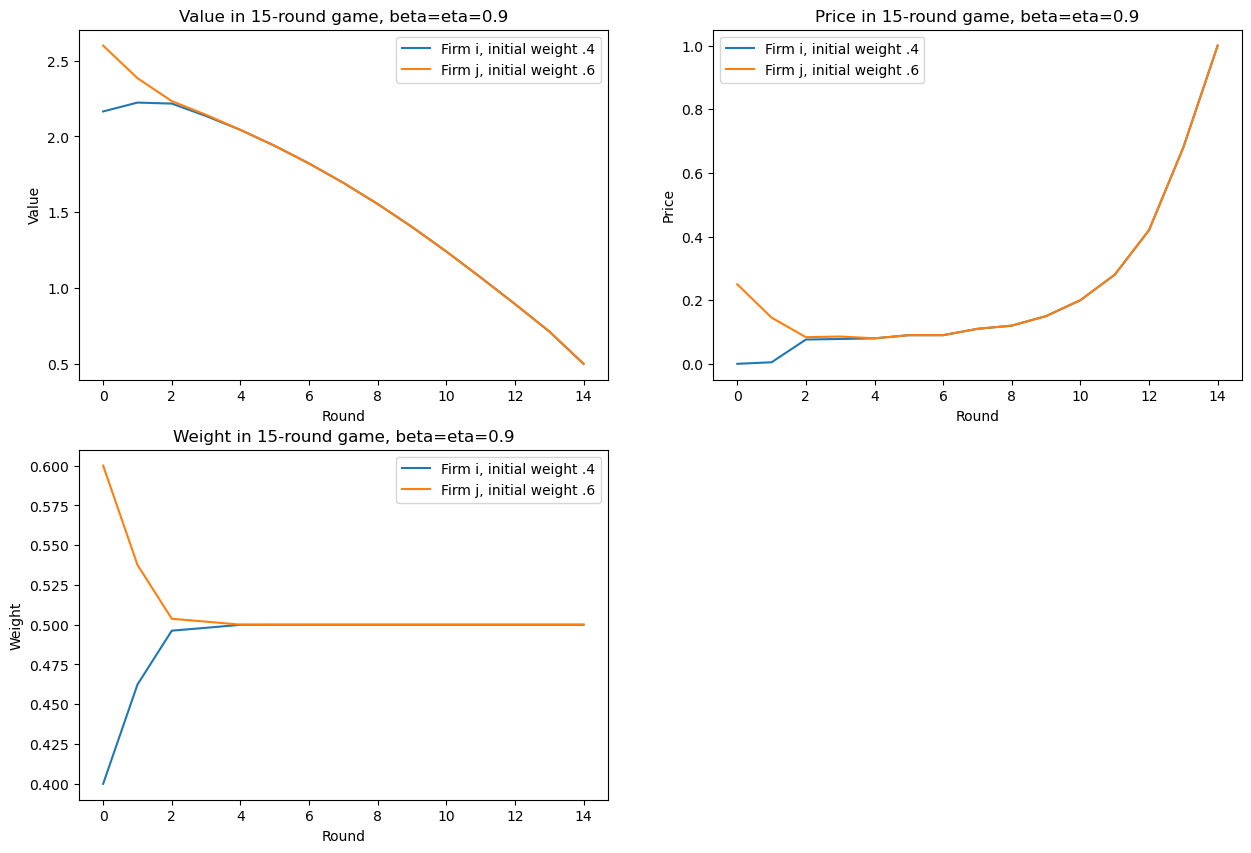

In [100]:
#graph of results for 15 rounds

num_rounds = 15
beta = 0.9
eta = 0.9
q_i_initial = 0.4

subset_results = subset_simulation_results(num_rounds, beta, eta, q_i_initial)
#set up plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the values
axs[0, 0].plot(subset_results['state_value_i_t'], label='Firm i, initial weight .4')
axs[0, 0].plot(subset_results['state_value_j_t'], label='Firm j, initial weight .6')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Value in 15-round game, beta=eta=0.9')
axs[0, 0].legend()

# Plotting the prices
axs[0, 1].plot(subset_results['p_i_t'], label='Firm i, initial weight .4')
axs[0, 1].plot(subset_results['p_j_t'], label='Firm j, initial weight .6')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price in 15-round game, beta=eta=0.9')
axs[0, 1].legend()

# Plotting the weights
axs[1, 0].plot(subset_results['q_i_t'], label='Firm i, initial weight .4')
axs[1, 0].plot(subset_results['q_j_t'], label='Firm j, initial weight .6')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Weight')
axs[1, 0].set_title('Weight in 15-round game, beta=eta=0.9')
axs[1, 0].legend()

# Hide the empty subplot
axs[1, 1].axis('off')

# Display the plot
plt.show()

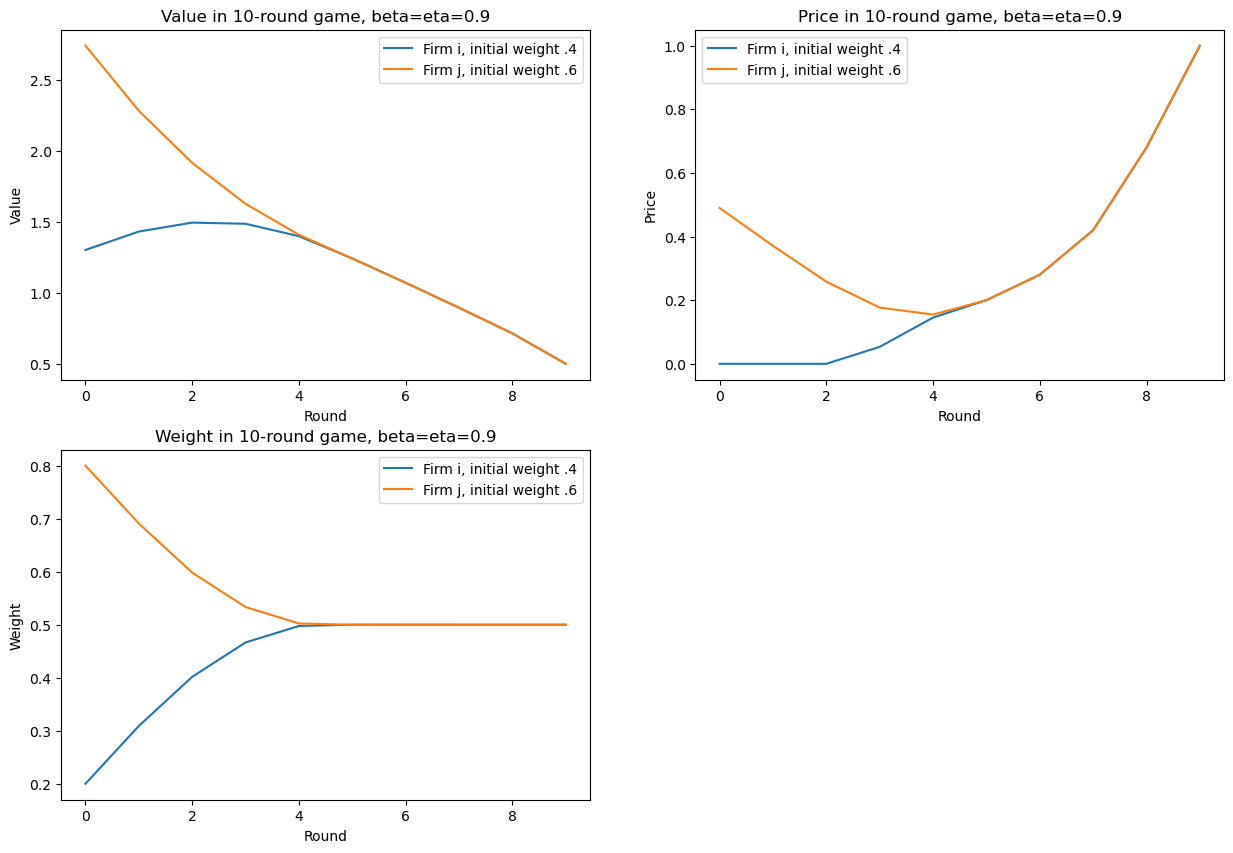

In [101]:
#graph of results for 10 rounds, even more uneven market share

num_rounds = 10
beta = 0.9
eta = 0.9
q_i_initial = 0.2

subset_results = subset_simulation_results(num_rounds, beta, eta, q_i_initial)
#set up plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the values
axs[0, 0].plot(subset_results['state_value_i_t'], label='Firm i, initial weight .2')
axs[0, 0].plot(subset_results['state_value_j_t'], label='Firm j, initial weight .8')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Value in 10-round game, beta=eta=0.9')
axs[0, 0].legend()

# Plotting the prices
axs[0, 1].plot(subset_results['p_i_t'], label='Firm i, initial weight .2')
axs[0, 1].plot(subset_results['p_j_t'], label='Firm j, initial weight .8')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price in 10-round game, beta=eta=0.9')
axs[0, 1].legend()

# Plotting the weights
axs[1, 0].plot(subset_results['q_i_t'], label='Firm i, initial weight .2')
axs[1, 0].plot(subset_results['q_j_t'], label='Firm j, initial weight .8')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Weight')
axs[1, 0].set_title('Weight in 10-round game, beta=eta=0.9')
axs[1, 0].legend()

# Hide the empty subplot
axs[1, 1].axis('off')

# Display the plot
plt.show()

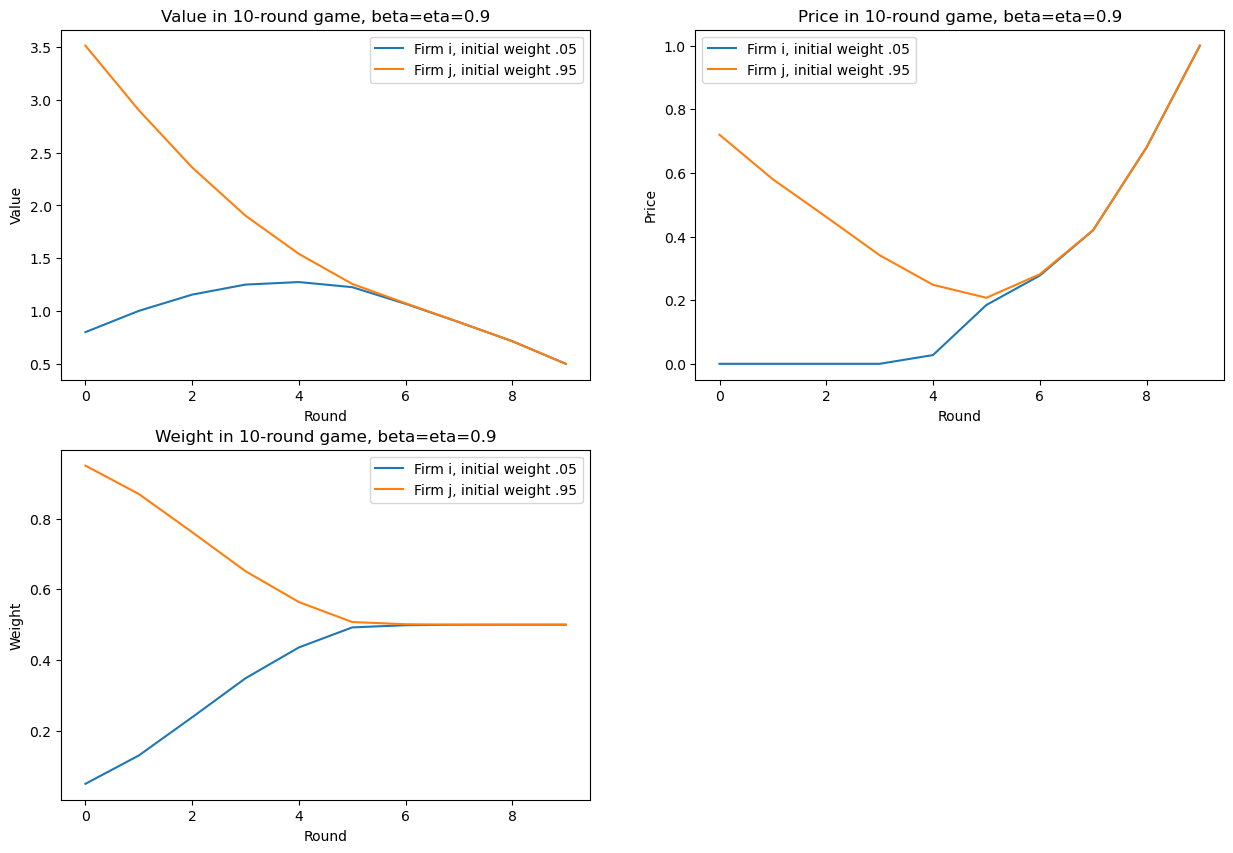

In [102]:
#graph of results for 10 rounds, even more uneven market share

num_rounds = 10
beta = 0.9
eta = 0.9
q_i_initial = 0.05

subset_results = subset_simulation_results(num_rounds, beta, eta, q_i_initial)
#set up plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the values
axs[0, 0].plot(subset_results['state_value_i_t'], label='Firm i, initial weight .05')
axs[0, 0].plot(subset_results['state_value_j_t'], label='Firm j, initial weight .95')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Value in 10-round game, beta=eta=0.9')
axs[0, 0].legend()

# Plotting the prices
axs[0, 1].plot(subset_results['p_i_t'], label='Firm i, initial weight .05')
axs[0, 1].plot(subset_results['p_j_t'], label='Firm j, initial weight .95')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price in 10-round game, beta=eta=0.9')
axs[0, 1].legend()

# Plotting the weights
axs[1, 0].plot(subset_results['q_i_t'], label='Firm i, initial weight .05')
axs[1, 0].plot(subset_results['q_j_t'], label='Firm j, initial weight .95')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Weight')
axs[1, 0].set_title('Weight in 10-round game, beta=eta=0.9')
axs[1, 0].legend()

# Hide the empty subplot
axs[1, 1].axis('off')

# Display the plot
plt.show()

array([0.4       , 0.4899559 , 0.49896542, 0.49971391, 0.49987987])